In [ ]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import random
import os
import shutil

tf.random.set_seed(4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set your group's Drive path
modelPathName = "/content/drive/MyDrive/Wheat Harvesting"

Splitting the Images for Train and Test

In [ ]:
%cd "/content/drive/MyDrive/Wheat Harvesting/Harvest"

/content/drive/.shortcut-targets-by-id/1CSkF7liWx5_pLZe0IqREo5FzKzWMaq-x/Wheat Harvesting/Harvest


In [ ]:
files_to_copy = os.listdir()

for file in files_to_copy:
    shutil.copy(file, "/content/drive/MyDrive/Wheat Harvesting/Train/Ready")

In [ ]:
%cd "/content/drive/MyDrive/Wheat Harvesting/Not Ready"

/content/drive/.shortcut-targets-by-id/1CSkF7liWx5_pLZe0IqREo5FzKzWMaq-x/Wheat Harvesting/Not Ready


In [ ]:
files_to_copy = os.listdir()

for file in files_to_copy:
    shutil.copy(file, "/content/drive/MyDrive/Wheat Harvesting/Train/Unready")

In [ ]:
%cd "/content/drive/MyDrive/Wheat Harvesting/Train/Ready"

/content/drive/.shortcut-targets-by-id/1CSkF7liWx5_pLZe0IqREo5FzKzWMaq-x/Wheat Harvesting/Train/Ready


In [ ]:
files_to_move = os.listdir()
files_to_move = random.sample(files_to_move, 17)

for file in files_to_move:
    shutil.move(file, "/content/drive/MyDrive/Wheat Harvesting/Test/Ready")

In [ ]:
%cd "/content/drive/MyDrive/Wheat Harvesting/Train/Unready"

/content/drive/.shortcut-targets-by-id/1CSkF7liWx5_pLZe0IqREo5FzKzWMaq-x/Wheat Harvesting/Train/Unready


In [ ]:
files_to_move = os.listdir()
files_to_move = random.sample(files_to_move, 19)

for file in files_to_move:
    shutil.move(file, "/content/drive/MyDrive/Wheat Harvesting/Test/Unready")

In [ ]:
# Creating the Pathlib PATH objects
train_path = Path("/content/drive/MyDrive/Wheat Harvesting/Train")
test_path = Path("/content/drive/MyDrive/Wheat Harvesting/Test")

In [ ]:
# Collecting all the Paths Inside "Normal" and "Pneumonia" folders of the above paths
train_image_paths = train_path.glob("*/*")
test_image_paths = test_path.glob("*/*")

# Output is a Generator object
print(train_image_paths)

<generator object Path.glob at 0x7f102e52a040>


In [ ]:
# Convert Generator Object to List of elements 
train_image_paths = list(train_image_paths)
test_image_paths = list(test_image_paths)

# Now the outputs are "PosixPath" objects
print(train_image_paths[:3])

[PosixPath('/content/drive/MyDrive/Wheat Harvesting/Train/Unready/unready1.jpeg'), PosixPath('/content/drive/MyDrive/Wheat Harvesting/Train/Unready/unready2.jpeg'), PosixPath('/content/drive/MyDrive/Wheat Harvesting/Train/Unready/unready3.jpeg')]


In [ ]:
# Convert Posix paths to normal strings
train_image_paths = list(map(lambda x : str(x) , train_image_paths))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))

print(train_image_paths[:3])

['/content/drive/MyDrive/Wheat Harvesting/Train/Unready/unready1.jpeg', '/content/drive/MyDrive/Wheat Harvesting/Train/Unready/unready2.jpeg', '/content/drive/MyDrive/Wheat Harvesting/Train/Unready/unready3.jpeg']


In [ ]:
# Collect Length for Training and Validation Datasets
train_dataset_length = len(train_image_paths)
test_dataset_length = len(test_image_paths)

print("Number of train image: ", train_dataset_length)
print("Number of testing image: ", test_dataset_length)

Number of train image:  152
Number of testing image:  36


In [ ]:
#CHANGE THE LABEL HERE

# Every Image has Label in its path , so lets slice it 
LABELS = {'Ready' : 0 , 'Unready' : 1}
INV_LABELS = {0 : 'Ready' , 1 : 'Unready'}


def get_label(path : str) -> int:
    return LABELS[path.split("/")[-2]]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
# val_labels = list(map(lambda x : get_label(x) , val_image_paths))
test_image_labels = list(map(lambda x : get_label(x) , test_image_paths))

print(train_image_labels[:3])

[1, 1, 1]


<Axes: ylabel='count'>

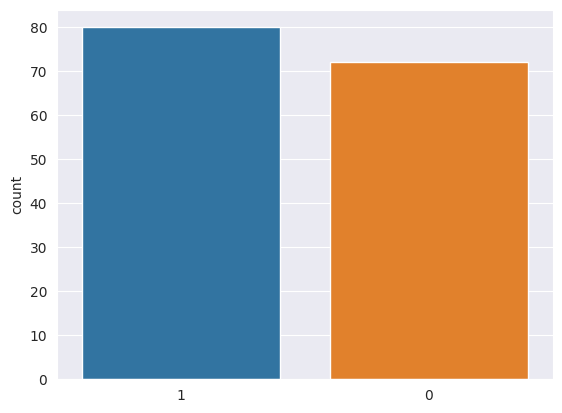

In [ ]:
l = []
for i in train_image_labels:
  l.append(str(i))
sns.set_style('darkgrid')
sns.countplot(x=l) 

In [ ]:
# Now we have all training, validation image paths and their respective labels 

BATCH_SIZE = 16

# Function used for Transformation
def load_and_transform(images, train = True):
    image = tf.io.read_file(images)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = image / 255
    image = tf.image.resize(image, [224 , 224], method="nearest")
    return image

In [ ]:
len(train_image_paths)

152

In [ ]:
train_images_paths = []
train_images_labels = []

for i, val in enumerate(train_image_paths):
  try:
    train_images_paths.append(load_and_transform(val))
    train_images_labels.append(train_image_labels[i])
  except:
    print(val)

# train_image_paths_all = [load_and_transform(i) for i in train_image_paths]
train_images_paths = np.asarray(train_images_paths)
train_images_labels = np.asarray(train_images_labels)

In [ ]:
print(train_images_paths.shape)
print(train_images_labels.shape) 

(152, 224, 224, 3)
(152,)


In [ ]:
test_images_paths = []
test_images_labels = []

for i, val in enumerate(test_image_paths):
  try:
    test_images_paths.append(load_and_transform(val))
    test_images_labels.append(test_image_labels[i])
  except:
    print(val)

# test_image = [load_and_transform(i) for i in test_image_paths]
test_images_paths = np.asarray(test_images_paths)
test_images_labels = np.asarray(test_images_labels)
print(test_images_paths.shape)
print(test_images_labels.shape) 

(36, 224, 224, 3)
(36,)


In [ ]:
train_images_labels_cat = tf.keras.utils.to_categorical(train_images_labels)
test_images_labels_cat = tf.keras.utils.to_categorical(test_images_labels)


train_images_labels_cat[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
#Split test data into val data and test data

from sklearn.model_selection import train_test_split 

test_images, val_images, test_labels, val_labels = train_test_split(test_images_paths , test_images_labels_cat, test_size=0.4, random_state=42)

In [ ]:
train_images = train_images_paths
train_labels = train_images_labels_cat

In [ ]:
print(train_images[1].shape)
print(train_labels[1].shape)

(224, 224, 3)
(2,)


Unready


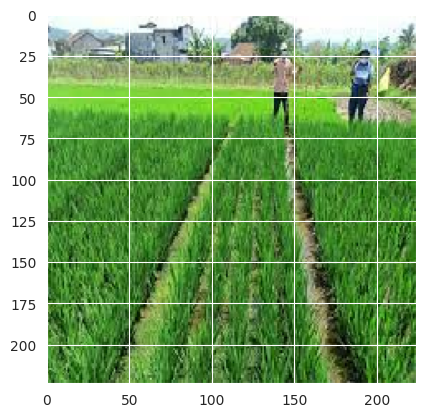

In [ ]:
# View a sample Train Image
print(INV_LABELS[train_images_labels[0]])
plt.imshow(train_images_paths[0].reshape(224 , 224 , 3))

Ready


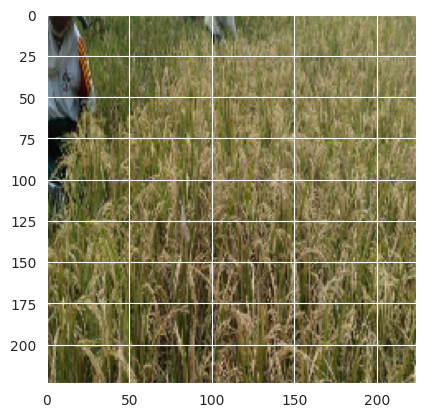

In [ ]:
# View a sample test Image
print(INV_LABELS[test_images_labels[0]])
plt.imshow(test_images_paths[0].reshape(224 , 224 , 3))

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,
        rotation_range=30,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
        ) 


datagen.fit(train_images)

In [ ]:
print(train_images.shape)
print(train_labels.shape) 

(152, 224, 224, 3)
(152, 2)


In [ ]:
print(test_images.shape)
print(test_labels.shape) 

(21, 224, 224, 3)
(21, 2)


In [ ]:
# Building EfficentNetB3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3

backbone = InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False
)

model2 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    #CHANGE NUMBER OF LABEL HERE FROM 15 TO YOUR TOTAL OF UNIQUE LABELS
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model2.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 22,065,314
Trainable params: 22,030,882
Non

In [ ]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights_inception.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
# Train the model
history = model2.fit(
    datagen.flow(train_images,train_labels, batch_size = 16),
    steps_per_epoch=train_dataset_length//BATCH_SIZE,
    epochs=15,
    callbacks=[checkpoint , early_stop, learning_rate_reduction],
    validation_data = datagen.flow(val_images, val_labels)
)

Epoch 1/15
9/9 [==============================] - ETA: 0s - loss: 0.8122 - accuracy: 0.6397 - precision: 0.5789 - recall: 0.7279
Epoch 1: val_loss improved from inf to 7.29215, saving model to best_weights_inception.h5
9/9 [==============================] - 102s 9s/step - loss: 0.8122 - accuracy: 0.6397 - precision: 0.5789 - recall: 0.7279 - val_loss: 7.2922 - val_accuracy: 0.5333 - val_precision: 0.5333 - val_recall: 0.5333 - lr: 0.0010
Epoch 2/15
9/9 [==============================] - ETA: 0s - loss: 0.3008 - accuracy: 0.8897 - precision: 0.8552 - recall: 0.9118
Epoch 2: val_loss did not improve from 7.29215
9/9 [==============================] - 73s 8s/step - loss: 0.3008 - accuracy: 0.8897 - precision: 0.8552 - recall: 0.9118 - val_loss: 14.3659 - val_accuracy: 0.4667 - val_precision: 0.5000 - val_recall: 0.9333 - lr: 0.0010
Epoch 3/15
9/9 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8897 - precision: 0.8786 - recall: 0.9044
Epoch 3: val_loss improved fro

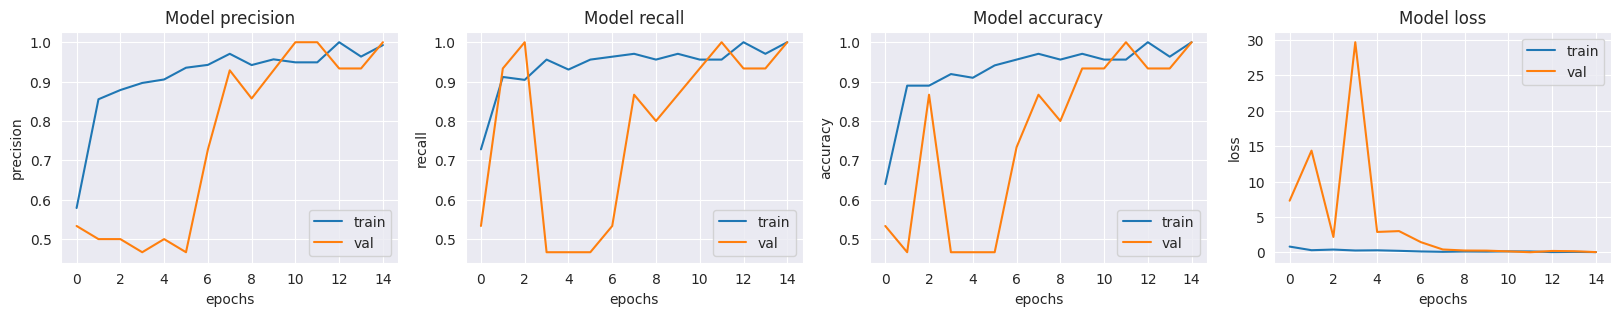

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
import pandas as pd
metrics = ['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall']
models = [history]
model_name = ['InceptionV3']
best_model = []

for i in models:
  m = np.argmax(i.history['val_accuracy'])
  for j in metrics:
    best_model.append(i.history[j][m])

df = pd.DataFrame((np.array(best_model)).reshape(1,8), columns=metrics, index=model_name)

In [ ]:
df

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
InceptionV3,0.124981,0.955882,0.948905,0.955882,0.015439,1.0,1.0,1.0


In [ ]:
# Saving & load the Model to test

# Save the whole model (weigths + architecture)
model2.save("model.h5")
model2.save(modelPathName+'/model.h5')

In [ ]:
# Load the whole model + architecture
try:
    loaded_model = tf.keras.models.load_model("model.h5")
except:
    loaded_model = tf.keras.models.load_model(modelPathName+'/model.h5')

In [ ]:
# Evaluating the loaded model
loss, acc, prec, rec = loaded_model.evaluate(test_images, test_labels)

print(" Testing Loss " , loss)
print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

1/1 [==============================] - 8s 8s/step - loss: 0.1428 - accuracy: 0.9524 - precision: 0.9524 - recall: 0.9524
 Testing Loss  0.14279396831989288
 Testing Acc :  0.9523809552192688
 Testing Precision  0.9523809552192688
 Testing Recall  0.9523809552192688


In [ ]:
y_pred_cat = loaded_model.predict(test_images)
y_pred = np.argmax(y_pred_cat, axis=1)

y_test = np.argmax(test_labels, axis=1)

1/1 [==============================] - 3s 3s/step


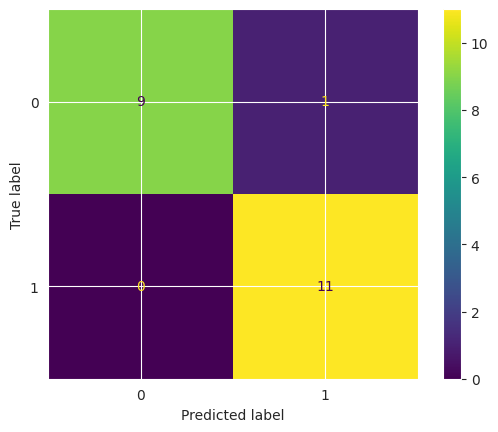

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

#CHANGE THE TARGET NAMES ACCORDING TO YOUR LABEL
target_names = ['Ready' , 'Unready']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Ready       1.00      0.90      0.95        10
     Unready       0.92      1.00      0.96        11

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



In [ ]:
from PIL import Image, ImageOps
from tensorflow import keras

In [ ]:
# loaded_model.predict(test_images)
prediction = loaded_model.predict(test_images)
classID = np.argmax(prediction)
classID

1/1 [==============================] - 3s 3s/step


6

In [ ]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image = Image.open(modelPathName+'/Test/Ready/R (1).png')
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array
prediction = loaded_model.predict(data)
classID = np.argmax(prediction)
# classID

1/1 [==============================] - 0s 217ms/step


In [ ]:
# Load the model from the h5 file
# model = keras.models.load_model('model-restnet.h5')

# Load the image data that you want to predict
image = keras.preprocessing.image.load_img(modelPathName+'/Test/Ready/R (1).png', target_size=(224, 224))
image_array = keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

# Normalize the image data
image_array = keras.applications.mobilenet_v2.preprocess_input(image_array)

# Make a prediction
prediction = loaded_model.predict(image_array)

# Display the predicted class
predicted_class = np.argmax(prediction)
print('Predicted class:', predicted_class)

1/1 [==============================] - 0s 299ms/step
Predicted class: 1


1/1 [==============================] - 0s 365ms/step
/content/drive/MyDrive/Wheat Harvesting/Test/Ready/R (1).png
Predicted:  Ready


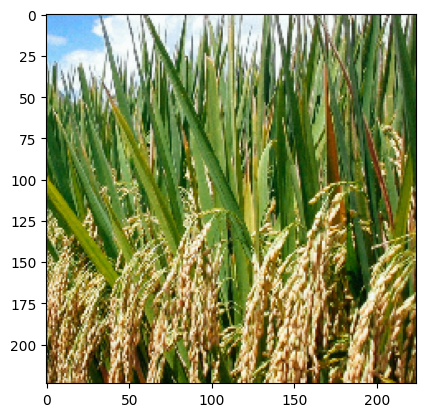

In [ ]:
image_path = modelPathName+'/Test/Ready/R (1).png'

# Function used for Transformation
def load_and_transform(images, train = True):
    image = tf.io.read_file(images)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = image / 255
    image = tf.image.resize(image, [224 , 224], method="nearest")
    image = tf.expand_dims(image , 0)
    return image

image_test = load_and_transform(image_path)
label_cat = loaded_model.predict(image_test)
label = np.argmax(label_cat, axis=1)

# View a sample test Image
print(image_path)
plt.imshow(np.asarray(image_test).reshape(224,224,3))
print("Predicted: ", INV_LABELS[label[0]])

1/1 [==============================] - 0s 137ms/step
/content/drive/MyDrive/Wheat Harvesting/Test/Unready/unready25.jpeg
Predicted:  Unready


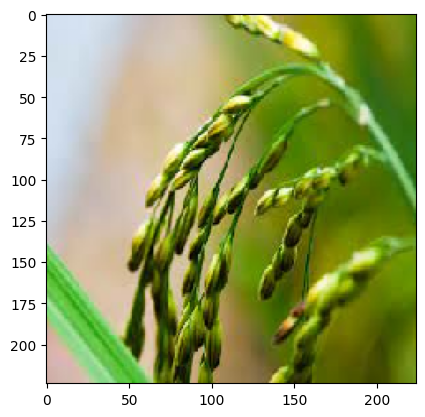

In [ ]:
image_path = modelPathName+'/Test/Unready/unready25.jpeg'

# Function used for Transformation
def load_and_transform(images, train = True):
    image = tf.io.read_file(images)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = image / 255
    image = tf.image.resize(image, [224 , 224], method="nearest")
    image = tf.expand_dims(image , 0)
    return image

image_test = load_and_transform(image_path)
label_cat = loaded_model.predict(image_test)
label = np.argmax(label_cat, axis=1)

# View a sample test Image
print(image_path)
plt.imshow(np.asarray(image_test).reshape(224,224,3))
print("Predicted: ", INV_LABELS[label[0]])